In [1]:
import numpy as np
from scipy import stats
import seaborn as sns
from scipy.stats import shapiro

# Задача 1
Из партии батареек с номинальным напряжением 12 В наугад выбрано семь штук. Согласно показаниям высокоточного вольтметра, фактически выдаваемое ими напряжение составило: 12,9; 11,6; 13,5; 13,9; 12,1; 11,9; 13,0 В соответственно. Можно ли считать, что среднее напряжение действительно равно 12 В?


Предполается, что $E[X_i]=\mu$


$H_0: \mu = \mu_0$


$H_A: \mu \neq \mu_0$

Воспользуемся критерием Стьюдента. 

In [2]:
sample = np.array([12.9, 11.6, 13.5, 13.9, 12.1, 11.9, 13.0])
mu0 = 12

Здесь и далее нулевая и альтернативная гипотезы для критерия Шапиро


$H_0$: Данные имеют нормальное распределение.


$H_A:$ Данные не имеют нормального распределения.

In [3]:
shapiro(sample)

ShapiroResult(statistic=0.9461530447006226, pvalue=0.6946031451225281)

$p>0.05$, у нас недостаточно оснований отвергнуть нулевую гипотезу о том, что выборка не имеет значимые отклонения от нормального распределения.

In [4]:
# вручную
df = len(sample)-1
student = stats.t(df)
T = (df)**0.5*(sample.mean() - mu0)/sample.std()
P = student.sf(T)*2 # Удвоение для двустороннего теста
print("Statistic T: ", T, ", p-value: ", P)

Statistic T:  2.1578017974978794 , p-value:  0.07430190210562303


In [5]:
# scipy 
stats.ttest_1samp(sample, mu0)

TtestResult(statistic=2.1578017974978794, pvalue=0.07430190210562303, df=6)

t-статистика: $t=2.16$, p-значение: $p=0.074$

$p>\alpha$ на уровне значимости $\alpha=0.05$ . Это означает, что у нас недостаточно оснований, чтобы отвергнуть нулевую гипотезу о том, что среднее напряжение действительно равно 12 В. 

# Задача 2
Есть два различных метода определения процентного содержания жира в мясе. Доля жира для 10 образцов мяса была определена каждым из двух методов. Позволяют ли полученные результаты сделать вывод о том, что один метод даёт в среднем более высокие показания, чем другой?
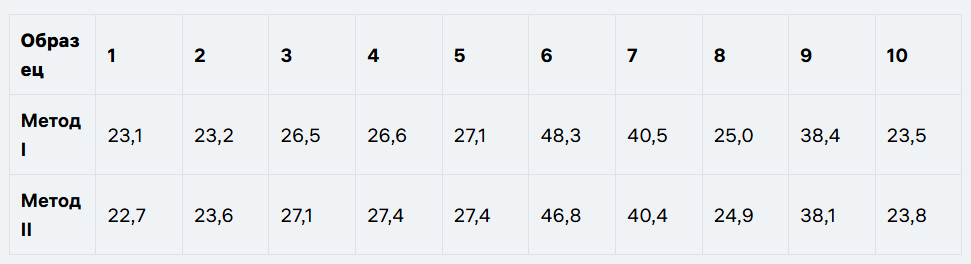

$D_i = X_i-Y_i$


$H_0$: $\bar{D} = 0$, cредняя разница между методами равна 0.


$H_A$: $\bar{D} \neq 0$, cредняя разница между методами не равна 0.

In [6]:
method_1 = np.array([23.1, 23.2, 26.5, 26.6, 27.1, 48.3, 40.5, 25.0, 38.4, 23.5])
method_2 = np.array([22.7, 23.6, 27.1, 27.4, 27.4, 46.8, 40.4, 24.9, 38.1, 23.8])

d_methods = method_1 - method_2
d_methods

array([ 0.4, -0.4, -0.6, -0.8, -0.3,  1.5,  0.1,  0.1,  0.3, -0.3])

In [7]:
shapiro(d_methods)

ShapiroResult(statistic=0.8998485803604126, pvalue=0.21825909614562988)

In [8]:
mu0 = 0 

In [9]:
# вручную
df = len(d_methods)-1
student = stats.t(df)
T = (df)**0.5*(d_methods.mean() - mu0)/d_methods.std()
P = student.sf(T)*2 # Удвоение для двустороннего теста
print("Statistic T: ", T, ", p-value: ", P)
# scipy 
stats.ttest_1samp(d_methods, mu0)

Statistic T:  1.715488497867803e-15 , p-value:  0.9999999999999987


TtestResult(statistic=1.7154884978678027e-15, pvalue=0.9999999999999987, df=9)

$p>\alpha$ на уровне значимости $\alpha=0.05$ . Это означает, что у нас недостаточно оснований, чтобы отвергнуть нулевую гипотезу о том, что средние значения результатов двух методов не различаются. 

# Задача 3
Для проверки гипотезы о том, что жители городов имеют в среднем более высокое систолическое артериальное давление, чем жители сельской местности, было проведено обследование 10 горожан и 9 жителей села примерно одного возраста. Получены следующие данные об уровне давления для горожан: 132, 111, 119, 138, 200, 131, 138, 170, 159, 140; для селян: 115, 190, 127, 155, 148, 121, 116, 121, 197. Можно ли считать верной выдвинутую гипотезу на уровне значимости 0,05?

In [10]:
urban = np.array([132, 111, 119, 138, 200, 131, 138, 170, 159, 140])
rural = np.array([115, 190, 127, 155, 148, 121, 116, 121, 197])

In [11]:
shapiro(urban)

ShapiroResult(statistic=0.9100654125213623, pvalue=0.2814405560493469)

$p>0.05$, поэтому мы не отвергаем нулевую гипотезу.

In [12]:
shapiro(rural)

ShapiroResult(statistic=0.828664243221283, pvalue=0.043139804154634476)

$p<0.05$, поэтому мы **отвергаем** нулевую гипотезу. Данные для селян не распределены нормально на уровне значимости 0.05.

Проверим гипотезу о сдвиге средних с помощью критерия Манна-Уитни

In [13]:
stats.mannwhitneyu(urban, rural, alternative='greater')

MannwhitneyuResult(statistic=50.0, pvalue=0.3565312487796153)

$p>\alpha$: Мы не отвергаем нулевую гипотезу. На уровне значимости $\alpha=0.05$ у нас недостаточно оснований, чтобы утверждать, что горожане имеют в среднем более высокое систолическое давление, чем селяне.

# Задача 4
Известно, что 52% новорождённых детей — мальчики, а 48% — девочки. В случайной выборке из 5 000 человек в возрасте от 30 до 60 лет мужчин оказалось 2 500. Можно ли на уровне значимости 0,05 считать, основываясь на этих данных, что смертность среди мужчин и женщин одинакова?

$H_0: p=p_0$. Доля мужчин в первой и второй выборке одинакова, следовательно, смертность среди мужчин и женщин одинакова.


$H_A:p\neq p_0$. Доля мужчин в первой и второй выборке отличаются, следовательно, смертность среди мужчин и женщин различается.

В нашем случае $p_0=0.52$

In [14]:
n1 = 5000
m1 = 0.52 * n1

n2 = 5000
m2 = 2500
T = (m1/n1 - m2/n2)/((m1+m2)/(n1+n2)*(1 - (m1+m2)/(n1+n2))*(1/n1 + 1/n2))**0.5
P = (1 - stats.norm.cdf(T))*2 # Удвоение для двухстороннего теста
print("Statistic: ",T,", p-value: ",P)

Statistic:  2.0004001200400157 , p-value:  0.0454570754450172


$p<\alpha$: Мы отвергаем нулевую гипотезу. На уровне значимости $\alpha=0.05$ существует статистически значимое различие в смертности между мужчинами и женщинами в возрасте от 30 до 60 лет.

# Задача 5
В первом эксперименте для сравнения двух средних X1=17, X2=16 применялся t-критерий Стьюдента, и эти различия оказались значимы (p = 0, 001).

Во втором исследовании, также при помощи t - критерия, сравнивались два средних X1=17, X2=36, и эти различия не значимы при p = 0,8. В чем может быть причина таких результатов, при условии, что нулевая и альтернативная гипотезы в обоих случаях одинаковы?

$T = \frac{X_1-X_2}{\sqrt{\frac{S_1^2}{m} + \frac{S_2^2}{n}}}$

1. Размер выборки: Увеличение объема выборки повышает статистическую мощность теста, что позволяет более уверенно обнаруживать различия между средними значениями. 
2. Стандартное отклонение: Высокая вариативность данных увеличивает стандартную ошибку, снижая значение t-статистики и делая различия менее значимыми. Наличие выбросов также может существенно влиять на результаты анализа. 
3. Распределение данных: Отклонения от нормального распределения, особенно в небольших выборках, могут приводить к некорректным результатам t-теста.